# Статистическое моделирование

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

In [1]:
import statsmodels.api as sm

In [2]:
import statsmodels.formula.api as smf

In [3]:
import statsmodels.graphics.api as smg

In [4]:
import patsy

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
from scipy import stats

In [9]:
import seaborn as sns

## Статистические модели и формулы patsy

In [10]:
np.random.seed(123456789)

In [11]:
y = np.array([1, 2, 3, 4, 5])

In [12]:
x1 = np.array([6, 7, 8, 9, 10])

In [13]:
x2 = np.array([11, 12, 13, 14, 15])

In [14]:
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T

In [15]:
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [16]:
beta, res, rank, sval = np.linalg.lstsq(X, y, rcond=None)

In [17]:
beta

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -4.44089210e-16])

In [18]:
data = {"y": y, "x1": x1, "x2": x2}

In [19]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)

In [20]:
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [21]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [22]:
type(X)

patsy.design_info.DesignMatrix

In [23]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [24]:
df_data = pd.DataFrame(data)

In [25]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")

In [26]:
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [27]:
model = sm.OLS(y, X)

In [28]:
result = model.fit()

In [29]:
result.params

,0
Intercept,-5.555556e-01
x1,1.888889e+00
x2,-8.888889e-01
x1:x2,-4.440892e-16


In [30]:
model = smf.ols("y ~ 1+x1+x2+x1*x2", df_data)

In [31]:
result = model.fit()

In [32]:
result.params

,0
Intercept,-5.555556e-01
x1,1.888889e+00
x2,-8.888889e-01
x1:x2,-4.440892e-16


In [33]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.388e+26
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.19e-27
Time:                        20:28:46   Log-Likelihood:                 143.02
No. Observations:                   5   AIC:                            -280.0
Df Residuals:                       2   BIC:                            -281.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5556    3.3e-13  -1.68e+12      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [34]:
beta

array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -4.44089210e-16])

In [35]:
from collections import defaultdict

In [36]:
data = defaultdict(lambda: np.array([1,2,3]))

In [37]:
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [38]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [39]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [40]:
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [41]:
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [42]:
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [43]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}

In [44]:
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [45]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [46]:
patsy.dmatrices("y ~ a*a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [47]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [48]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [49]:
z = lambda x1, x2: x1+x2

In [50]:
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

### Задание 1.
Сформируйте произвольный набор 4-х независимых признаков в количестве 200 образцов, на основе произвольных трех из них сформируйте целевую переменную как линейную комбинацию одного из них с синусом суммы двух других с коэффициентами 2 и 3 соответственно. К линейной комбинации добавьте гауссовский шум с дисперсией 1 и средним 0. Реализуйте функцию, которая принимает на вход массивы независимых и зависимого признаков, и выводит регрессионные коэффициенты, R2 критерий, номер признака низкой значимости. Проверьте работу функции на сгенерированном наборе данных.  

Результаты анализа регрессии:
Коэффициенты регрессии: [ 2.0562193   0.88205734  0.95121192 -0.08895078]
R2 score: 0.6085
Наименее значимый признак (индекс): 3


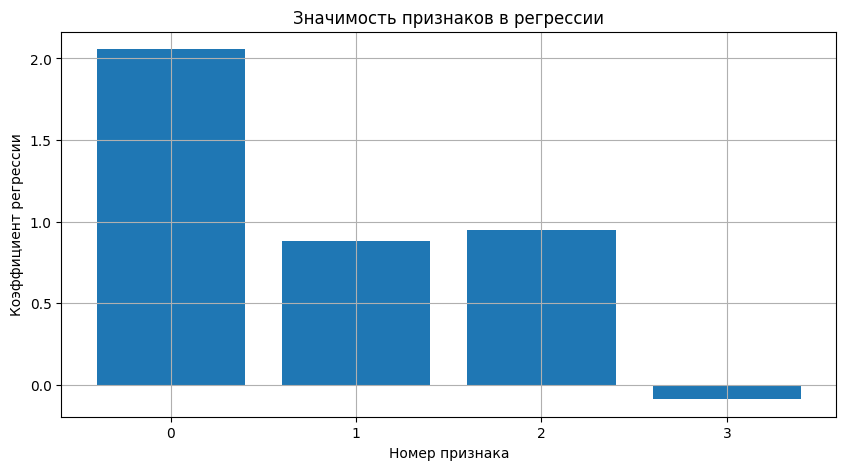

In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## 1. Генерация данных
np.random.seed(42)

# Создаем 4 независимых признака (200 образцов)
X = np.random.randn(200, 4)  # 200 samples, 4 features

# Формируем целевую переменную: y = 2*x1 + 3*sin(x2 + x3) + noise
x1, x2, x3 = X[:, 0], X[:, 1], X[:, 2]
y = 2*x1 + 3*np.sin(x2 + x3) + np.random.normal(0, 1, size=200)

## 2. Функция для анализа регрессии
def analyze_regression(X, y):
    """
    Анализирует линейную регрессию и выводит статистики

    Параметры:
    X - массив независимых признаков (n_samples, n_features)
    y - массив целевой переменной (n_samples,)

    Возвращает:
    tuple: (коэффициенты регрессии, R2 score, номер наименее значимого признака)
    """
    # Добавляем константу для intercept
    X_with_const = sm.add_constant(X)

    # Обучаем OLS модель
    model = sm.OLS(y, X_with_const).fit()

    # Получаем коэффициенты (исключая intercept)
    coef = model.params[1:]

    # Вычисляем VIF для каждого признака (без intercept)
    vifs = [variance_inflation_factor(X_with_const, i) for i in range(1, X_with_const.shape[1])]

    # Находим наименее значимый признак (с наибольшим p-value, исключая intercept)
    p_values = model.pvalues[1:]
    least_significant = np.argmax(p_values)

    return coef, model.rsquared, least_significant

## 3. Применяем функцию к нашим данным
coefficients, r2, least_sig_feature = analyze_regression(X, y)

## 4. Выводим результаты
print("Результаты анализа регрессии:")
print(f"Коэффициенты регрессии: {coefficients}")
print(f"R2 score: {r2:.4f}")
print(f"Наименее значимый признак (индекс): {least_sig_feature}")

## 5. Визуализация значимости признаков
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(4), coefficients)
plt.title("Значимость признаков в регрессии")
plt.xlabel("Номер признака")
plt.ylabel("Коэффициент регрессии")
plt.xticks(range(4))
plt.grid(True)
plt.show()

### Категориальные независимые переменные

In [51]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}

In [52]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [53]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [54]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}

In [55]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [56]:
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


# Линейная регрессия

In [57]:
np.random.seed(123456789)

In [58]:
N = 100

In [59]:
x1 = np.random.randn(N)

In [60]:
x2 = np.random.randn(N)

In [61]:
data = pd.DataFrame({"x1": x1, "x2": x2})

In [62]:
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2

In [63]:
data["y_true"] = y_true(x1, x2)

In [64]:
e = np.random.randn(N)

In [65]:
data["y"] = data["y_true"] + e

In [66]:
data.head()

,x1,x2,y_true,y
0,2.212902,-0.474588,-0.198823,-1.452775
1,2.128398,-1.524772,-12.298805,-12.560965
2,1.841711,-1.939271,-15.420705,-14.715090
3,0.082382,0.345148,2.313945,1.190283
4,0.858964,-0.621523,-1.282107,0.307772


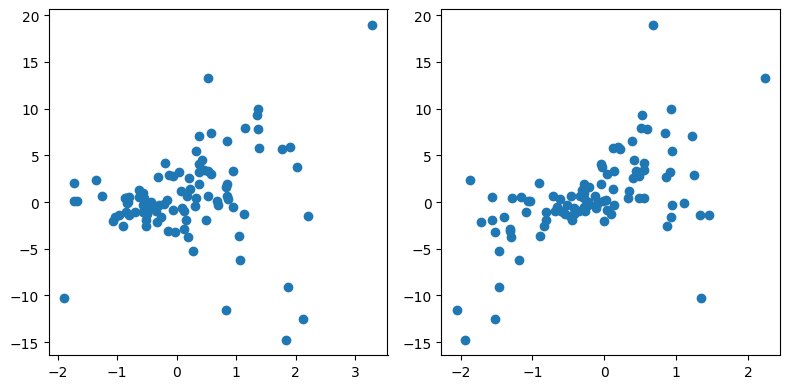

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()

In [68]:
data.shape

(100, 4)

In [69]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)

In [70]:
result = model.fit()

In [71]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.21e-64
Time:                        20:28:52   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

In [72]:
result.rsquared

np.float64(0.9553393745884368)

In [73]:
result.resid.head()

,0
0,-1.131214
1,-0.299607
2,0.627431
3,-0.978776
4,1.695182


In [74]:
z, p = stats.normaltest(result.resid.values)

In [75]:
p

np.float64(0.22874710482505073)

In [76]:
result.params

,0
Intercept,0.870620
x1,1.969345
x2,2.967004
x1:x2,3.943993


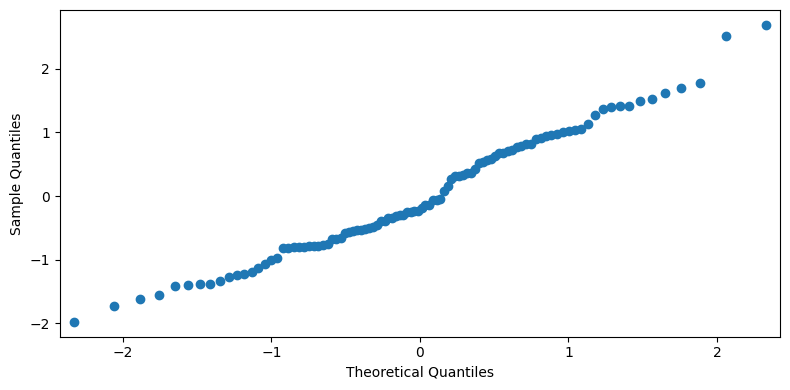

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
#fig.savefig("ch14-qqplot-model-1.pdf")

In [78]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)

In [79]:
result = model.fit()

In [80]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.21e-64
Time:                        20:28:54   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

In [81]:
result.params

,0
Intercept,0.870620
x1,1.969345
x2,2.967004
x1:x2,3.943993


In [82]:
result.rsquared

np.float64(0.9553393745884368)

In [83]:
z, p = stats.normaltest(result.resid.values)

In [84]:
p

np.float64(0.22874710482505073)

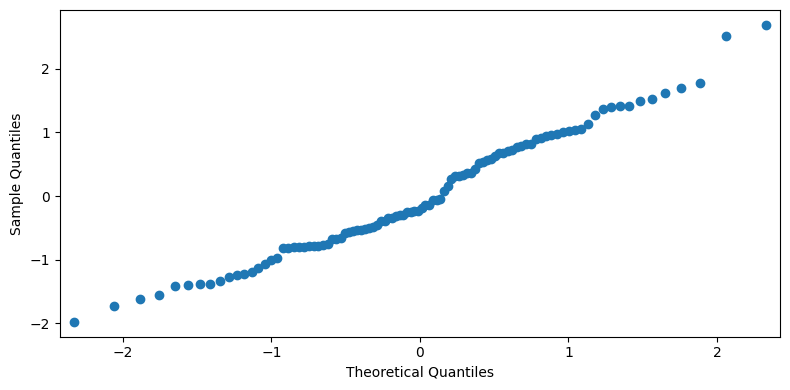

In [85]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
#fig.savefig("ch14-qqplot-model-2.pdf")

In [86]:
x = np.linspace(-1, 1, 50)

In [87]:
X1, X2 = np.meshgrid(x, x)

In [88]:
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [89]:
y_pred = result.predict(new_data)

In [90]:
y_pred.shape

(2500,)

In [91]:
y_pred = y_pred.values.reshape(50, 50)

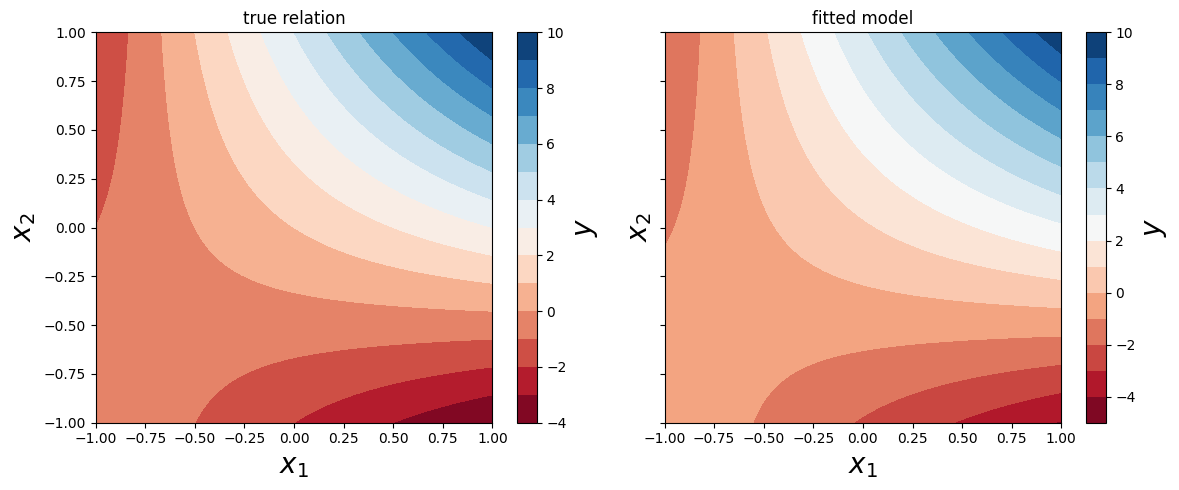

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()
#fig.savefig("ch14-comparison-model-true.pdf")

### Задание 2
Провести стастический анализ остатков регрессии полученных из функции Задания 1. Имеется в виду тест на нормальное распределение и визуализация квантилей. Сформируйте предсказание модели и постройте трехмерную цветовой график на двух значимых признаках, используя для истинных значений формулу, упоминавшуюся в задании 1 для целевого признака.

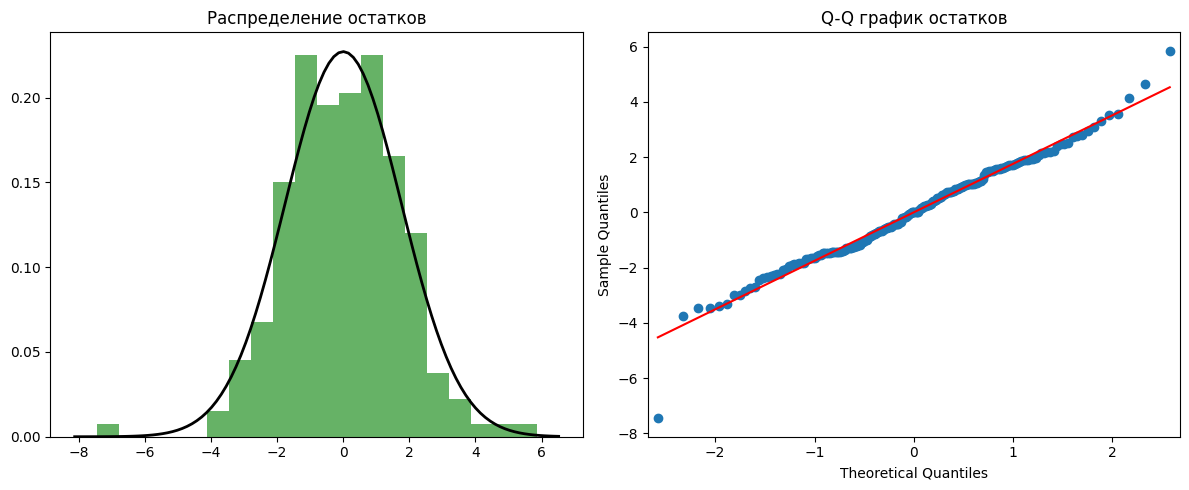

Тест Шапиро-Уилка: статистика=0.9848, p-value=0.0301


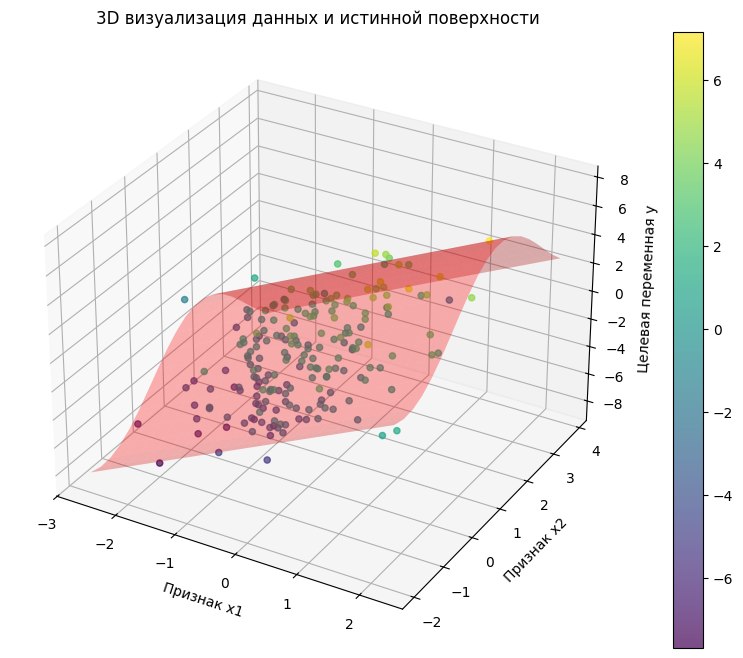

In [144]:

# 1. Генерация данных (как в задании 1)
np.random.seed(42)
X = np.random.randn(200, 4)
x1, x2, x3 = X[:, 0], X[:, 1], X[:, 2]
y = 2*x1 + 3*np.sin(x2 + x3) + np.random.normal(0, 1, 200)

# 2. Построение модели и получение остатков
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
y_pred = model.predict(X_with_const)
residuals = y - y_pred

# 3. Статистический анализ остатков
# Гистограмма с нормальным распределением
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Распределение остатков')

# Q-Q plot
plt.subplot(1, 2, 2)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q график остатков')

plt.tight_layout()
plt.show()

# Тест Шапиро-Уилка на нормальность
shapiro_test = stats.shapiro(residuals)
print(f"Тест Шапиро-Уилка: статистика={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")

# 4. 3D график на двух значимых признаках (x1 и x2)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Сетка для поверхности
x1_grid = np.linspace(min(x1), max(x1), 20)
x2_grid = np.linspace(min(x2), max(x2), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_grid, x2_grid)

# Истинная поверхность (используем среднее значение x3)
true_surface = 2*x1_mesh + 3*np.sin(x2_mesh + np.mean(x3))

# Цветовая схема по истинным значениям
scatter = ax.scatter(x1, x2, y, c=y, cmap='viridis', alpha=0.7)
ax.plot_surface(x1_mesh, x2_mesh, true_surface, alpha=0.3, color='red')

ax.set_xlabel('Признак x1')
ax.set_ylabel('Признак x2')
ax.set_zlabel('Целевая переменная y')
plt.title('3D визуализация данных и истинной поверхности')
plt.colorbar(scatter)
plt.show()

### Наборы данных из R

In [93]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")

In [94]:
dataset.title

'Ice Cream Consumption'

In [95]:
print(dataset.__doc__)

.. container::

   .. container::

      ======== ===============
      Icecream R Documentation
      ======== ===============

      .. rubric:: Ice Cream Consumption
         :name: ice-cream-consumption

      .. rubric:: Description
         :name: description

      four–weekly observations from 1951–03–18 to 1953–07–11

      *number of observations* : 30

      *observation* : country

      *country* : United States

      .. rubric:: Usage
         :name: usage

      .. code:: R

         data(Icecream)

      .. rubric:: Format
         :name: format

      A time series containing :

      cons
         consumption of ice cream per head (in pints);

      income
         average family income per week (in US Dollars);

      price
         price of ice cream (per pint);

      temp
         average temperature (in Fahrenheit);

      .. rubric:: Source
         :name: source

      Hildreth, C. and J. Lu (1960) *Demand relations with
      autocorrelated disturbances*, Tec

In [96]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cons    30 non-null     float64
 1   income  30 non-null     int64  
 2   price   30 non-null     float64
 3   temp    30 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


In [97]:
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)

In [98]:
result = model.fit()

In [99]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cons   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1001.
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                    9.03e-27
Time:                        20:29:03   Log-Likelihood:                          51.903
No. Observations:                  30   AIC:                                     -99.81
Df Residuals:                      28   BIC:                                     -97.00
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

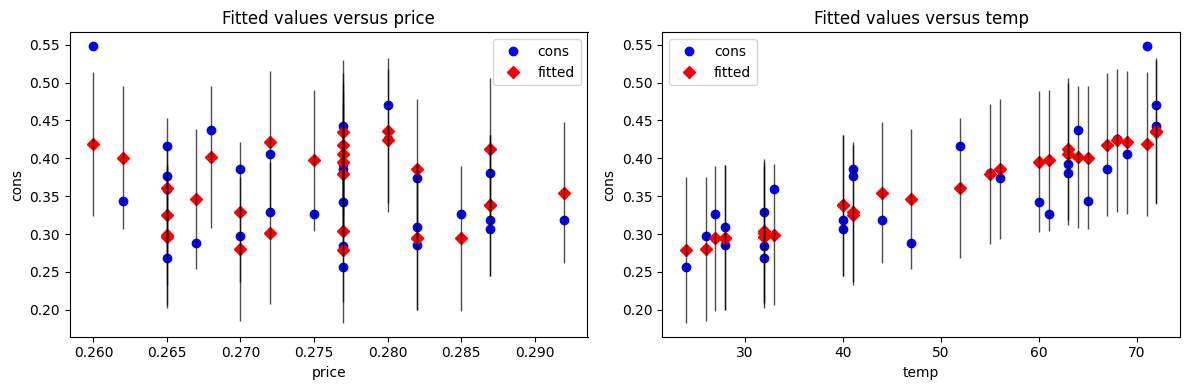

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

fig.tight_layout()
#fig.savefig("ch14-regressionplots.pdf")

In [101]:
dataset.data

,cons,income,price,temp
0,0.386,78,0.270,41
1,0.374,79,0.282,56
2,0.393,81,0.277,63
3,0.425,80,0.280,68
4,0.406,76,0.272,69
5,0.344,78,0.262,65
6,0.327,82,0.275,61
7,0.288,79,0.267,47
8,0.269,76,0.265,32
9,0.256,79,0.277,24


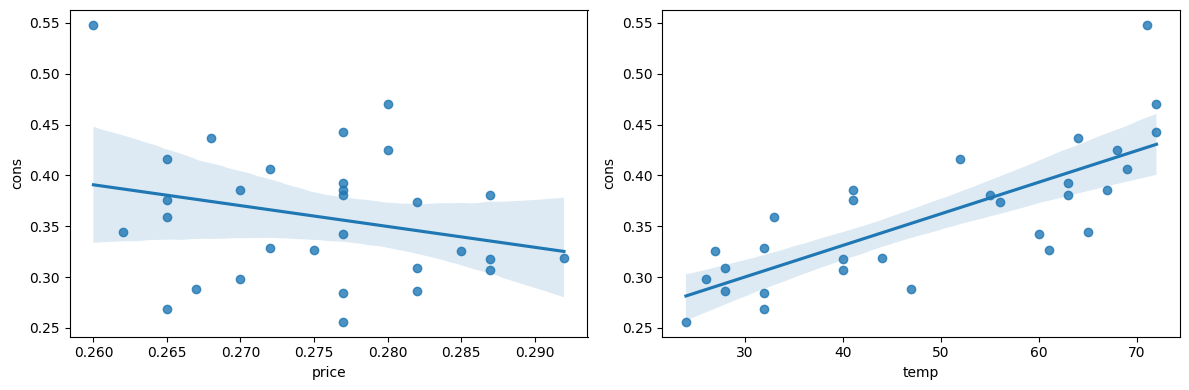

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x=dataset.data.price, y=dataset.data.cons, ax=ax1);
sns.regplot(x=dataset.data.temp, y=dataset.data.cons, ax=ax2);

fig.tight_layout()
#fig.savefig("ch14-regressionplots-seaborn.pdf")

### Задание 3.
Используя результаты регрессии в задании 1 построить графики из графического модуля статистических моделей с визуализацией предсказанных моделью величин и их целевых значений для всех независимых признаков. Воспользоваться регрессионными графиками библиотеки seaborn для независимых признаков. Почему графики заметно отличаются?  

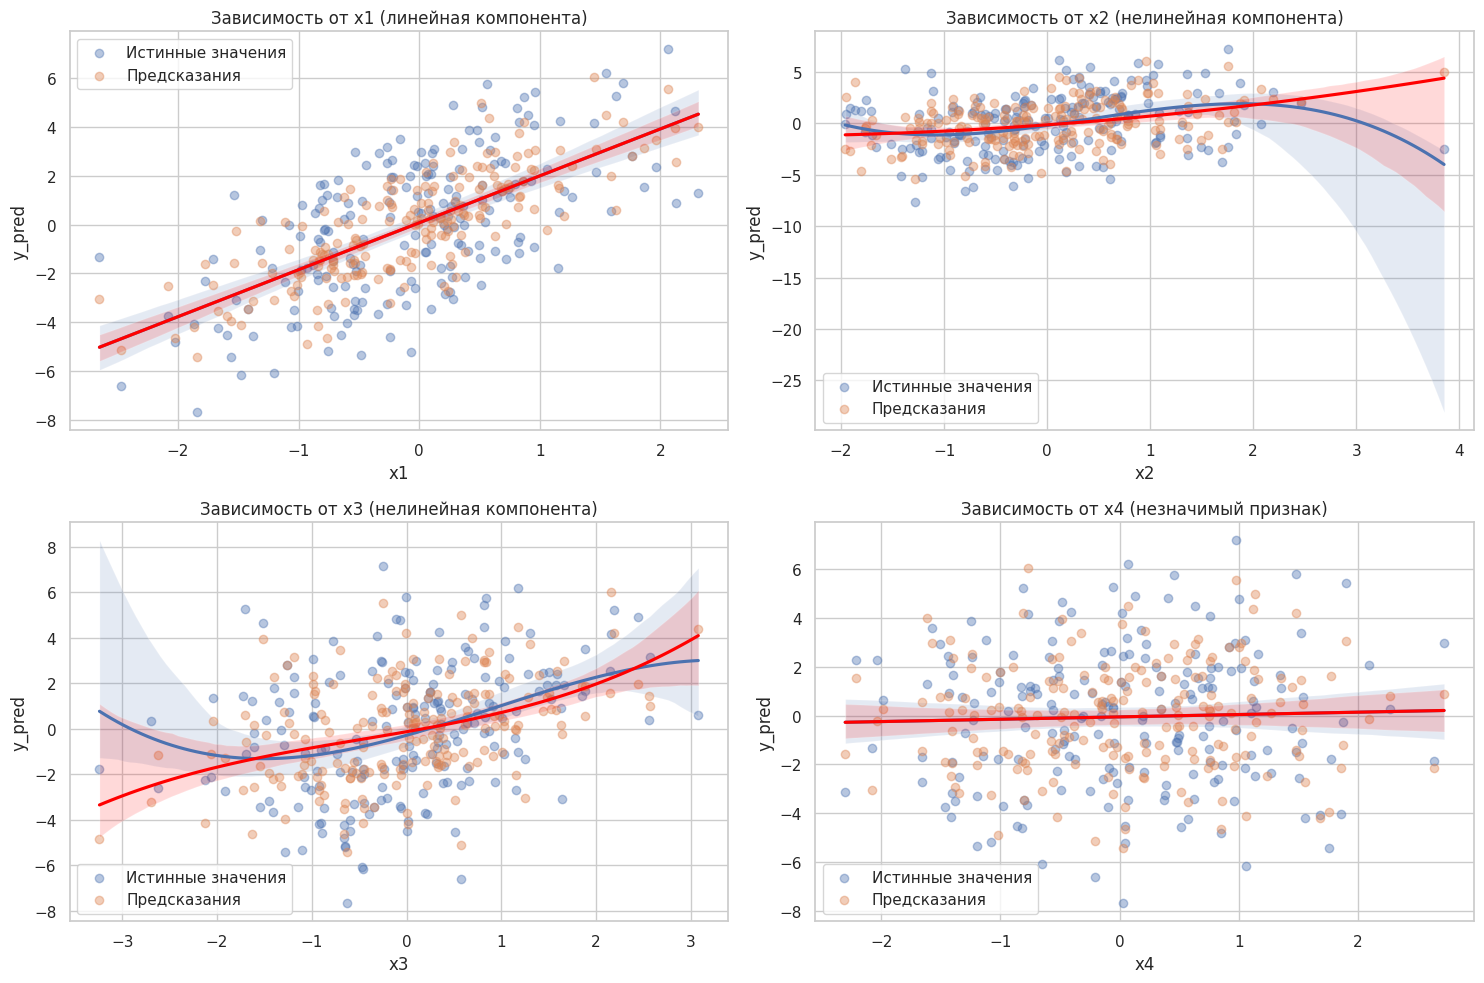

In [145]:

# Создаем DataFrame с данными
data = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4'])
data['y_true'] = y
data['y_pred'] = y_pred

# Настройка стиля графиков
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 1. График для x1 (линейный компонент)
plt.subplot(2, 2, 1)
sns.regplot(x='x1', y='y_true', data=data, label='Истинные значения',
            scatter_kws={'alpha':0.4})
sns.regplot(x='x1', y='y_pred', data=data, label='Предсказания',
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Зависимость от x1 (линейная компонента)')
plt.legend()

# 2. График для x2 (нелинейный компонент)
plt.subplot(2, 2, 2)
sns.regplot(x='x2', y='y_true', data=data, label='Истинные значения',
            scatter_kws={'alpha':0.4}, order=3)
sns.regplot(x='x2', y='y_pred', data=data, label='Предсказания',
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, order=3)
plt.title('Зависимость от x2 (нелинейная компонента)')
plt.legend()

# 3. График для x3 (нелинейный компонент)
plt.subplot(2, 2, 3)
sns.regplot(x='x3', y='y_true', data=data, label='Истинные значения',
            scatter_kws={'alpha':0.4}, order=3)
sns.regplot(x='x3', y='y_pred', data=data, label='Предсказания',
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, order=3)
plt.title('Зависимость от x3 (нелинейная компонента)')
plt.legend()

# 4. График для x4 (незначимый признак)
plt.subplot(2, 2, 4)
sns.regplot(x='x4', y='y_true', data=data, label='Истинные значения',
            scatter_kws={'alpha':0.4})
sns.regplot(x='x4', y='y_pred', data=data, label='Предсказания',
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Зависимость от x4 (незначимый признак)')
plt.legend()

plt.tight_layout()
plt.show()

## Дискретная, логистическая регрессия

In [103]:
df = sm.datasets.get_rdataset("iris").data

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [105]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [106]:
df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica" )].copy()

In [107]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()

In [108]:
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0})

In [109]:
df_subset.rename(columns={"Sepal.Length": "Sepal_Length", "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length", "Petal.Width": "Petal_Width"}, inplace=True)

In [110]:
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [111]:
model = smf.logit("Species ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", data=df_subset)

In [112]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


In [113]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.9142
Time:                        20:29:08   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.6378     25.708      1.659      0.097      -7.748      93.024
Sepal_Length     2.4652      2.394      1.030      0.303      -2.228       7.158
Sepal_Width      6.6809      4.480      1.49

In [114]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Sepal_Length     0.0445      0.038      1.163      0.245      -0.031       0.120
Sepal_Width      0.1207      0.064      1.891      0.059      -0.004       0.246
Petal_Length    -0.1703      0.057     -2.965      0.003      -0.283      -0.058
Petal_Width     -0.3303      0.110     -2.998      0.003      -0.546      -0.114


**Note:** Sepal_Length and Sepal_Width do not seem to contribute much to predictiveness of the model.

In [115]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

In [116]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [117]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.8517
Time:                        20:29:08   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

In [118]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181


In [119]:
params = result.params
beta0 = -params['Intercept']/params['Petal_Width']
beta1 = -params['Petal_Length']/params['Petal_Width']

In [120]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})

In [121]:
df_new["P-Species"] = result.predict(df_new)

In [122]:
df_new["P-Species"].head(3)

,P-Species
0,0.995472
1,0.799899
2,0.000033


In [123]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

In [124]:
df_new.head()

,Petal_Length,Petal_Width,P-Species,Species
0,4.717684,1.218695,0.995472,1
1,5.280952,1.292013,0.799899,1
2,5.610778,2.230056,0.000033,0
3,4.458715,1.907844,0.421614,0
4,4.822227,1.938929,0.061070,0


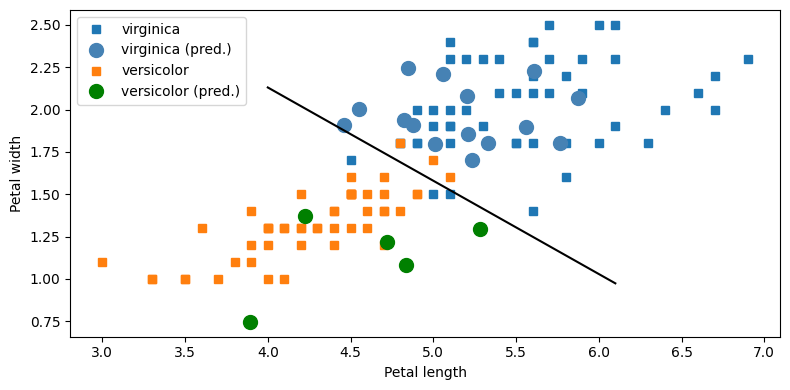

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

_x = np.array([4.0, 6.1])
ax.plot(_x, beta0 + beta1 * _x, 'k')

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend(loc=2)
fig.tight_layout()
#fig.savefig("ch14-logit.pdf")

### Задание 4.
Выполнить логистическую регрессию на данных по цветкам Ириса для классов Setosa и Versicolor. Оценить значимость независимых признаков. Выбрать два наиболие значимых. Визуализировать данные и прямую разделения данных на классы.

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        20:34:03   Log-Likelihood:            -8.9814e-06
converged:                      False   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 5.547e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6813    1.2e+04      0.001      0.999   -2.35e+04    2.35e+04
x1            -4.1173   3316.583     -0.001      0.999   -6504.50

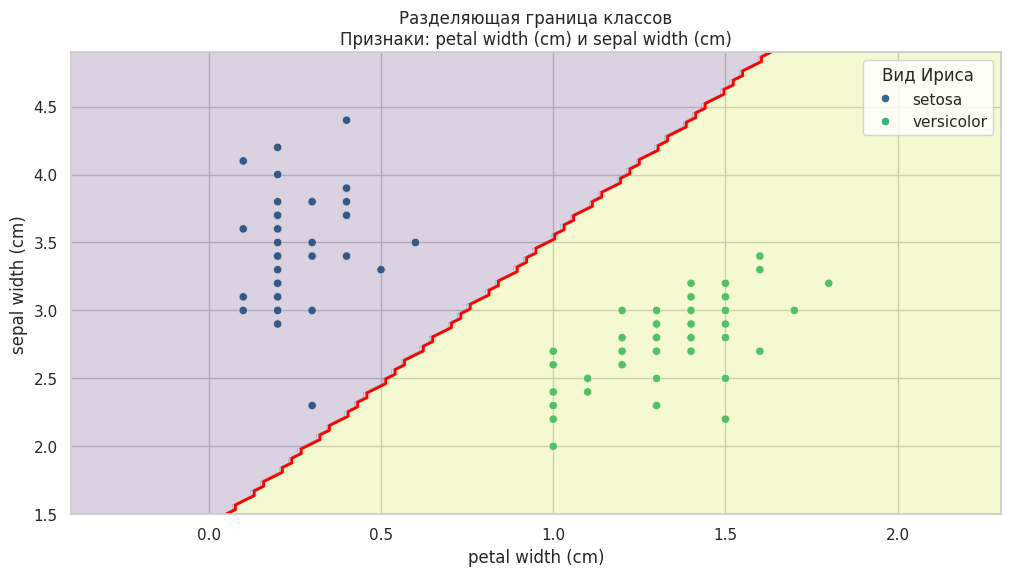

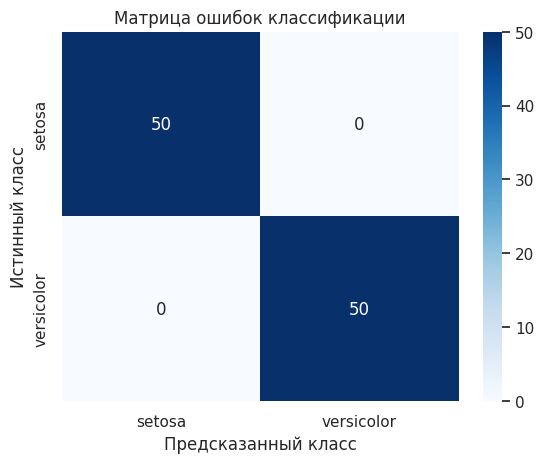

In [149]:
from sklearn.datasets import load_iris
# Загрузка данных
iris = load_iris()
X = iris.data[:100, :]  # Берем только Setosa и Versicolor (первые 100 образцов)
y = iris.target[:100]   # Соответствующие метки классов (0 и 1)

# Создаем DataFrame для анализа
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor'})

# 1. Оценка значимости признаков с помощью statsmodels
X_sm = sm.add_constant(X)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()
print(result.summary())

# 2. Выбор двух наиболее значимых признаков (по наименьшим p-values)
p_values = result.pvalues[1:]  # Игнорируем константу
most_significant = np.argsort(p_values)[:2]
selected_features = [iris.feature_names[i] for i in most_significant]
print(f"\nДва наиболее значимых признака: {selected_features}")

# 3. Логистическая регрессия на выбранных признаках
X_selected = X[:, most_significant]
log_reg = LogisticRegression().fit(X_selected, y)

# 4. Визуализация
plt.figure(figsize=(12, 6))

# График рассеяния с разделяющей прямой
sns.scatterplot(x=selected_features[0], y=selected_features[1],
                hue='species', data=iris_df, palette='viridis')

# Создаем сетку для разделяющей прямой
x_min, x_max = X[:, most_significant[0]].min() - 0.5, X[:, most_significant[0]].max() + 0.5
y_min, y_max = X[:, most_significant[1]].min() - 0.5, X[:, most_significant[1]].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
         np.linspace(y_min, y_max, 100))

# Предсказания для сетки
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Рисуем разделяющую прямую и контуры
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linewidths=2)

plt.title(f"Разделяющая граница классов\nПризнаки: {selected_features[0]} и {selected_features[1]}")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='Вид Ириса')
plt.grid(True)
plt.show()

# 5. Матрица ошибок
y_pred = log_reg.predict(X_selected)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['setosa', 'versicolor'],
            yticklabels=['setosa', 'versicolor'])
plt.title('Матрица ошибок классификации')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

### Распределение Пуассона

In [126]:
dataset = sm.datasets.get_rdataset("discoveries")

In [127]:
df = dataset.data.set_index("time").rename(columns={"value": "discoveries"})

In [128]:
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


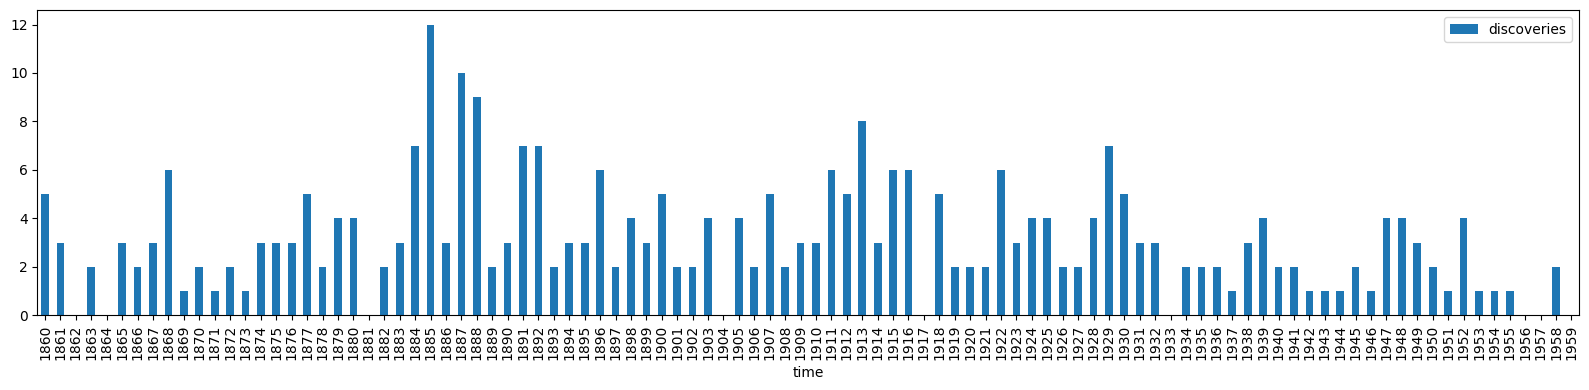

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)
fig.tight_layout()
#fig.savefig("ch14-discoveries.pdf")

In [130]:
model = smf.poisson("discoveries ~ 1", data=df)

In [131]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


In [132]:
print(result.summary())

                          Poisson Regression Results                          
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                   0.000
Time:                        20:29:11   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243


In [133]:
lmbda = np.exp(result.params)

In [134]:
X = stats.poisson(lmbda)

In [135]:
result.conf_int()

,0,1
Intercept,1.020084,1.242721


In [136]:
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])

In [137]:
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

In [138]:
v, k = np.histogram(df.values, bins=12, range=(0, 12), density=True)

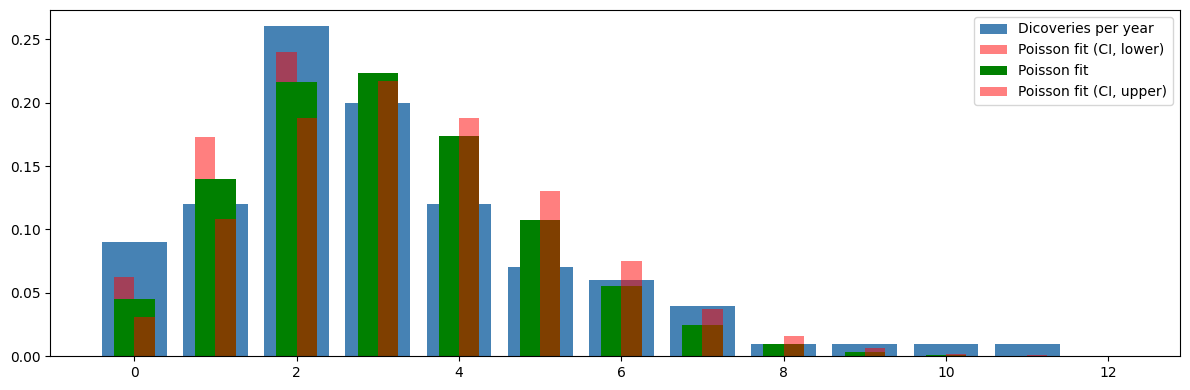

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue",  align='center', label='Dicoveries per year')
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green",  align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red",  alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, upper)')

ax.legend()
fig.tight_layout()
#fig.savefig("ch14-discoveries-per-year.pdf")

## Временные ряды

In [140]:
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()

FileNotFoundError: [Errno 2] No such file or directory: 'temperature_outdoor_2014.tsv'

In [ ]:
df_march = df[df.index.month == 3]

In [ ]:
df_april = df[df.index.month == 4]

In [ ]:
df_march.plot(figsize=(12, 4));

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])
fig.tight_layout()
#fig.savefig("ch14-timeseries-autocorrelation.pdf")

In [ ]:
model = sm.tsa.AutoReg(df_march.temp, lags = 72)

In [ ]:
result = model.fit()

In [ ]:
sm.stats.durbin_watson(result.resid)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=144, ax=ax)
fig.tight_layout()
#fig.savefig("ch14-timeseries-resid-acf.pdf")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], label="train data")
ax.plot(df_april.index.values[:72], df_april.temp.values[:72], label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values,
        result.predict("2014-04-01", "2014-04-4"), label="predicted outcome")

ax.legend()
fig.tight_layout()
#fig.savefig("ch14-timeseries-prediction.pdf")

In [ ]:
# Using ARIMA model on daily average temperatures

In [ ]:
df_march = df_march.resample("D").mean()
df_march.index.day

In [ ]:
df_april = df_april.resample("D").mean()

In [ ]:
result = sm.tsa.ARIMA(df_march.index.day, df_march, (0, 0, 0)).fit()

In [ ]:
result

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-3:], df_march.temp.values[-3:], 's-', label="train data")
ax.plot(df_april.index.values[:3], df_april.temp.values[:3], 's-', label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-3").values,
        result.predict(1,3), 's-', label="predicted outcome")
ax.legend()
fig.tight_layout()